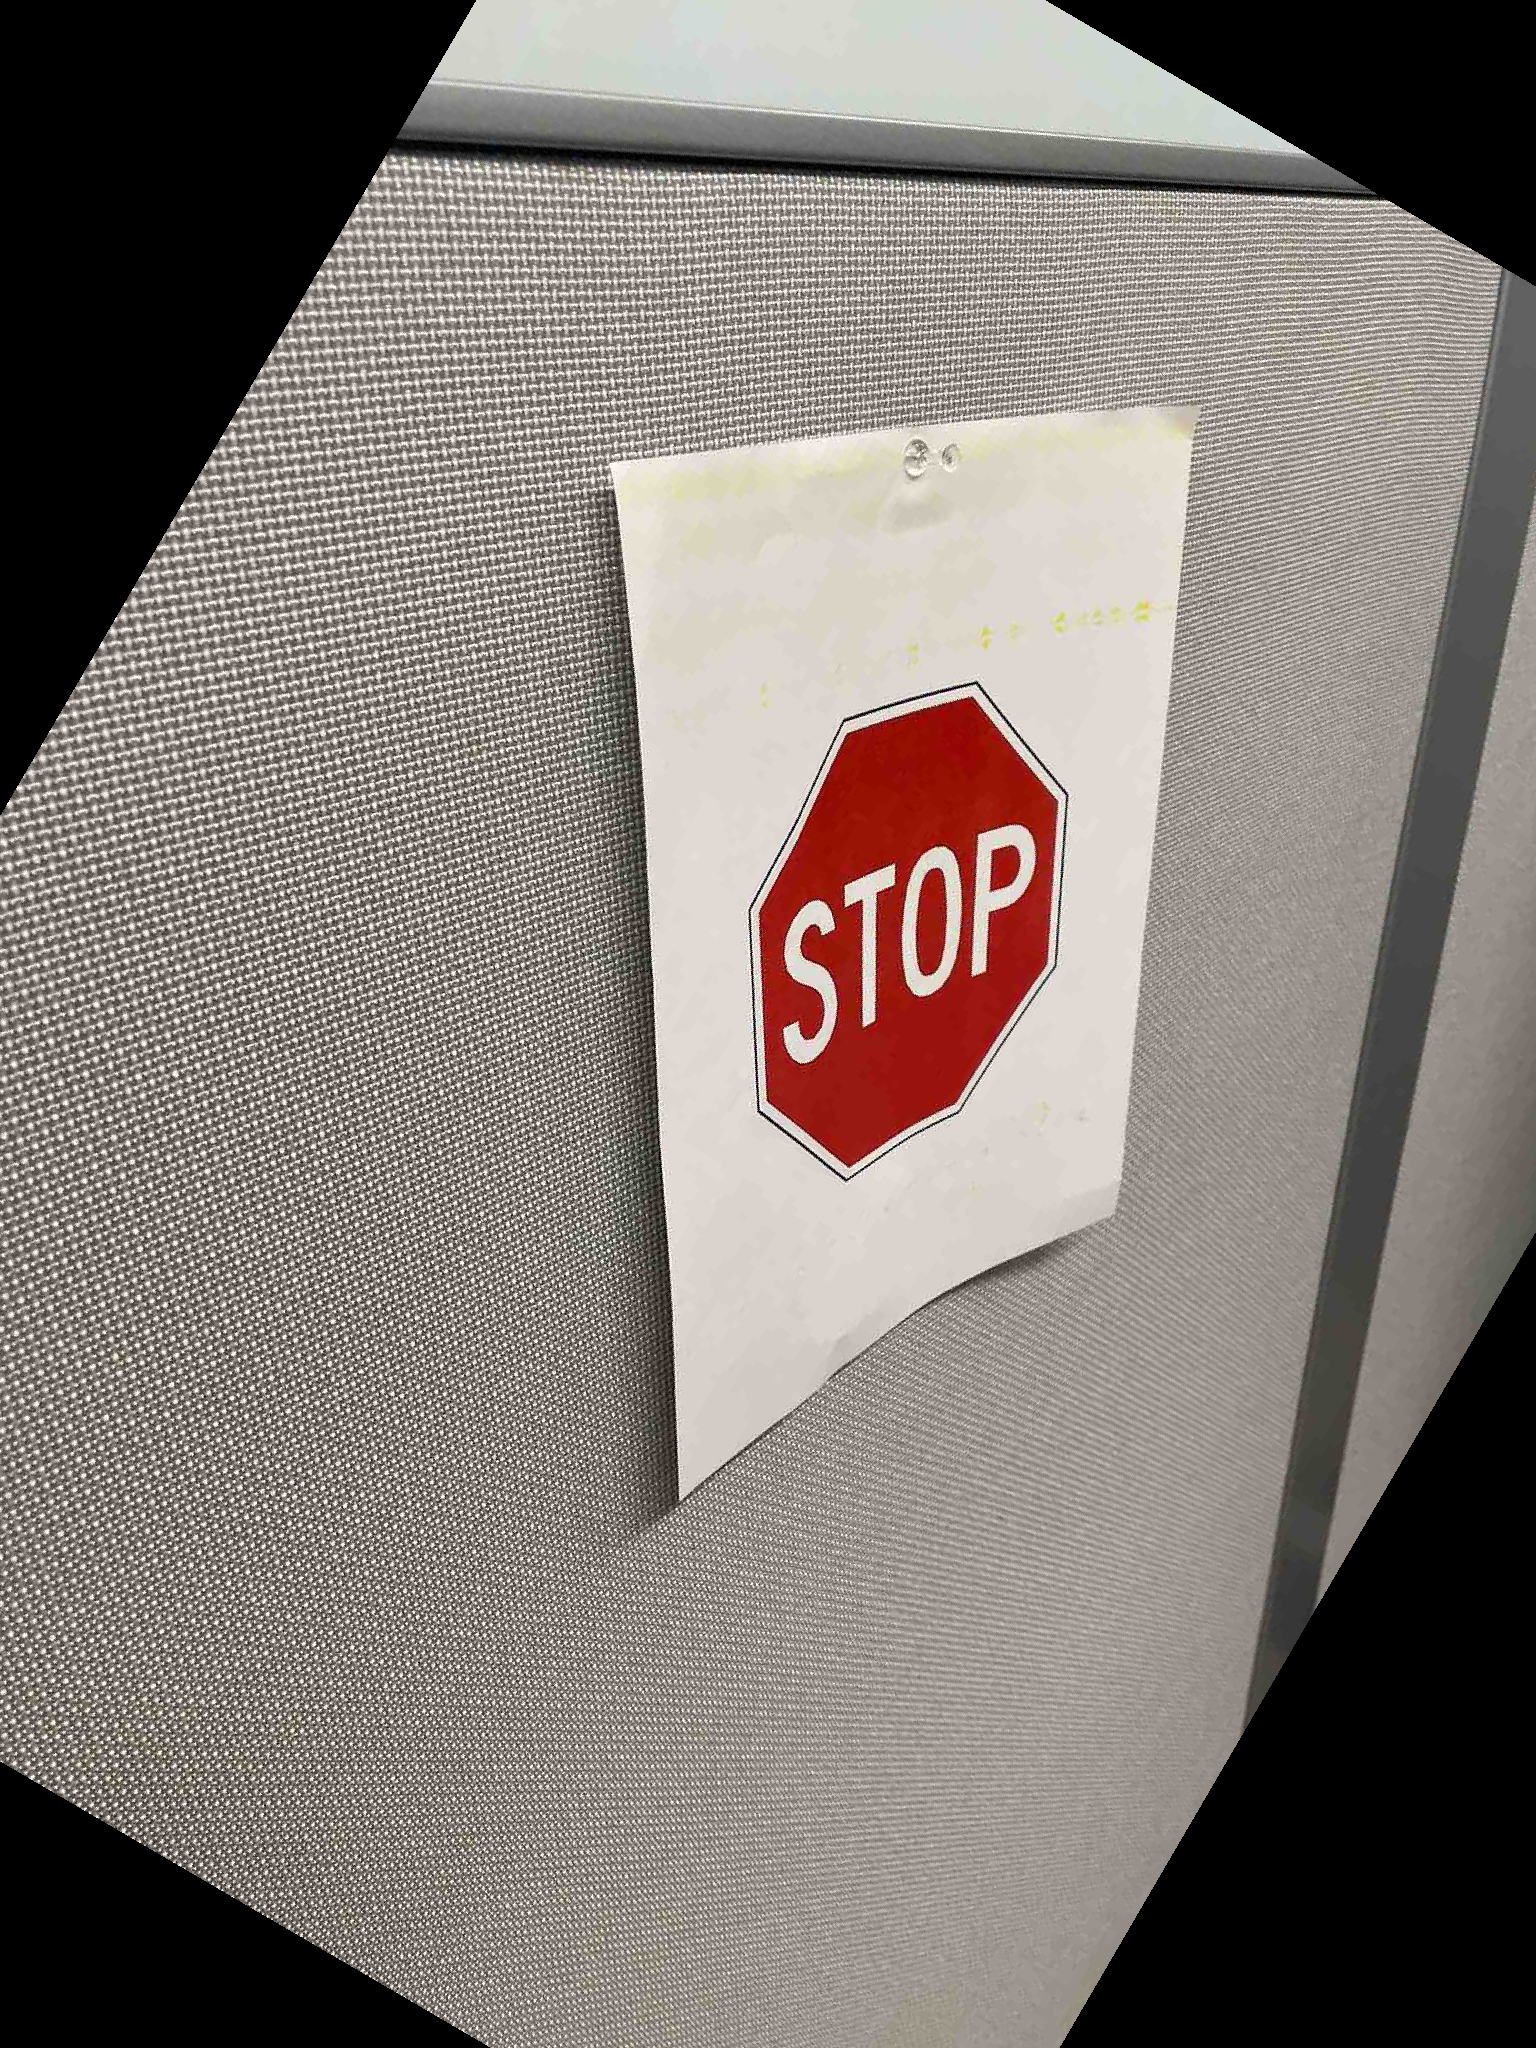

In [6]:
import torchvision.transforms as tvt
import torch

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from time import time


# img1 = Image.open('data/front.jpg')
# img2 = Image.open('data/oblique.jpg')

img1 = Image.open('data/1.jpg')
img2 = Image.open('data/2.jpg')
affine_tr = tvt.RandomAffine((30, 40))
img2 = affine_tr(img2)
display(img2)

img2.save('data/2_aff.jpg')

# replace the following with new points
# two = [[623, 589], [653, 1193], [958, 1143], [928, 722]]
# three = [[440, 691], [453, 1234], [1088, 1229], [1094, 691]]

# transformed_image = tvt.functional.perspective(img2, startpoints=two, endpoints=three)

In [2]:
def get_hist(img):
    tensor_img = tvt.functional.pil_to_tensor(img).float()
    hist_img = torch.histc(tensor_img, bins=10, min=0, max=255)
    hist_img = hist_img.div(hist_img.sum())
    return hist_img

hist_img1 = get_hist(img1)
hist_img2 = get_hist(transformed_image)# a

In [3]:
from scipy.stats import wasserstein_distance

dist = wasserstein_distance(hist_img1.cpu().numpy(), 
                            hist_img2.cpu().numpy())

In [5]:
from mydataset import MyDataset
from torch.utils.data import DataLoader

my_dataset = MyDataset('data')
print(len(my_dataset))
index = 9
print(my_dataset[index][0].shape, my_dataset[index][1])

10
torch.Size([3, 256, 256]) 9


In [26]:
start = time()
num_tot_images = len(my_dataset)
for i in range(1000):
    my_dataset.__getitem__(i%num_tot_images)

print(time() - start)

173.25428366661072


In [25]:
batch_size = 5
train_dataloader = DataLoader(my_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

start = time()

count = 0
while True:
    for img, labels in train_dataloader:
        count += labels.shape[0]
    if count >=1000:
        break
print(time() - start)

96.23933792114258


In [23]:
start = time()

count = 0
while True:
    for img, labels in train_dataloader:
        count += labels.shape[0]
    if count >=1000:
        break
print(time() - start)

161.33969831466675


In [ ]:
for i, (img, label) in enumerate(train_dataloader):
    print(img.shape, label)

In [ ]:
import matplotlib.pyplot as plt
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze().transpose(0, 1).transpose(1, 2)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")